In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

(sec:theory_measurementError)=
# Example: Measurement Error in Air Quality

Simulating the draw of marbles from an urn is a useful abstraction for studying the possible outcomes from survey samples and controlled experiments. The simulation works because it imitates the chance mechanism used to select a sample or to assign people to a treatment. In many settings, measurement error also follows a similar chance process. As mentioned in {numref}`Chapter %c <ch:data_scope>`, instruments typically have an error associated with them, and by taking repeated measurements on the same object, we can quantify the variability associated with the instrument.  

As an example, let's look at data from a PurpleAir sensor that measures air quality. PurpleAir provides a data download tool so anyone can access air quality measurements by interacting with their map. These data are available in 2-minute intervals for any sensor appearing on their map. To get a sense of the size of the variations in measurements for a sensor, we downloaded data for one sensor from a 24-hour period and selected five hours spread  throughout the day.
This gives us five sets of thirty consecutive measurements for a total of 150 measurements. 

In [2]:
pm = pd.read_csv('data/purpleAir2minsample.csv')
pm

,aq2.5,time,hour,diffs,meds
0,6.14,2022-04-01 00:01:10 UTC,0,0.77,5.38
1,5.00,2022-04-01 00:03:10 UTC,0,-0.38,5.38
2,5.29,2022-04-01 00:05:10 UTC,0,-0.09,5.38
...,...,...,...,...,...
147,8.08,2022-04-01 19:57:20 UTC,19,-0.47,8.55
148,7.38,2022-04-01 19:59:20 UTC,19,-1.18,8.55
149,7.26,2022-04-01 20:01:20 UTC,19,-1.29,8.55


The feature `aq2.5` in the data table refers to the amount of particulate matter measured in the air that has a diameter smaller than 2.5 micrometers (the unit of measurement is micrograms per cubic meter: μg/m3). These measurements are 2-minute averages. A scatter plot can gives us a sense of variation in the instrument. Within an hour, we expect the measurements to be roughly the same, so we can get a sense of the variability in the instrument. 

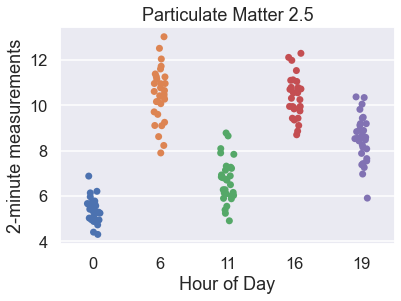

In [3]:
sns.stripplot(data=pm, x="hour", y="aq2.5",  dodge=True, size=7)
plt.xlabel("Hour of Day")
plt.ylabel("2-minute measurements")
plt.title("Particulate Matter 2.5");

At 11 in the morning, we see the measurements clump around 7 μg/m3, and five hours later, they cluster around 10 μg/m3 or so. While the level of particulate matter changes over the course of a day, in any one hour interval most measurements are within about +/-1 μg/m3 of the median. To get a better sense of this variation, we can examine the differences of each individual measurement from the median for the hour.

Text(0.5, 0, 'Deviation from Hourly Median')

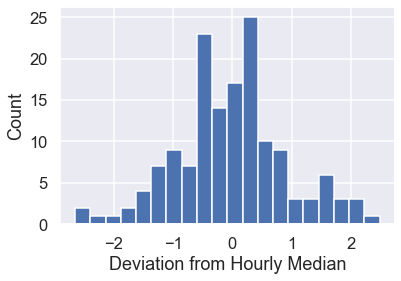

In [4]:
plt.hist(pm['diffs'], bins=20)
plt.ylabel('Count')
plt.xlabel('Deviation from Hourly Median')

The histogram shows us the typical error in measurements from this instrument are about 1 μg/m3. Given the hourly measurements range from 4 to 13 μg/m3, we find the instrument is reasonably accurate. Unfortunately, what we don't know is whether the measurements are close to the true air quality. To detect bias in the instrument, we need to make comparisons against a more accurate instrument or take measurements in a protected environment where the air has a known quantity of PM2.5. A more comprehensive analysis of the PurpleAir sensor measurement error, including bias, is addressed in {numref}`Chapter %s <ch:pa>`.